In [15]:
import numpy as np

from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister,transpile

from IPython.display import Math
from qc_workbook.show_state import statevector_expr

#########################################################################
#
#
def get_statevector_array(circuit):
    circuit = circuit.copy()
    circuit.save_statevector()
    circuit = transpile(circuit, backend=simulator)
    job = simulator.run(circuit)
    result = job.result()
    qiskit_statevector = result.data()['statevector']

    return np.asarray(qiskit_statevector), result

#########################################################################
#
#
simulator = AerSimulator(method='statevector')
print(simulator.name)

aer_simulator_statevector


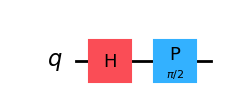

In [16]:
##############################################################
#
#  Q1.  1 qubic,  calc the following quantum state
#       1/sqrt(2) * ( |0> + i |1> )
#
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.p(np.pi/2.,0)

circuit.draw('mpl')

#circuit.u(np.pi/2., np.pi/2., 0., 0)

In [17]:
expr = statevector_expr(circuit, amp_norm=(np.sqrt(0.5), r'\frac{1}{\sqrt{2}}'))
Math(expr)


<IPython.core.display.Math object>

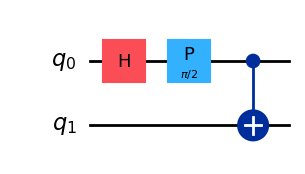

In [18]:
##############################################################
#
#  Q2.  2 qubics,  calc the following quantum state
#       1/sqrt(2) * ( |0> + i |3> )
#
circuit = QuantumCircuit(2)

circuit.h(0)
circuit.p(np.pi/2., 0)
circuit.cx(0, 1)

circuit.draw('mpl')

In [19]:
expr = statevector_expr(circuit, amp_norm=(np.sqrt(0.5), r'\frac{1}{\sqrt{2}}'))
Math(expr)

<IPython.core.display.Math object>

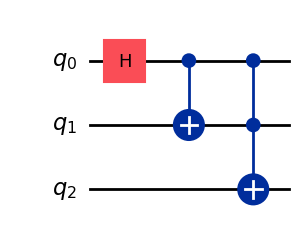

In [20]:
##############################################################
#
#  Q3.  3 qubics,  calc the following quantum state: GHZ state
#       1/sqrt(2) * ( |0> + |7> )
#
circuit = QuantumCircuit(3)

circuit.h(0)
circuit.cx(0, 1)
circuit.mcx([0, 1], 2)

circuit.draw('mpl')

In [22]:
expr = statevector_expr(circuit, amp_norm=(np.sqrt(0.5), r'\frac{1}{\sqrt{2}}'))
Math(expr)

<IPython.core.display.Math object>

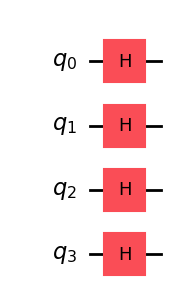

In [23]:
##############################################################
#
#  Q4.  n qubics,  calc the following quantum state
#                     2**n-1
#       1/sqrt(2**n) sigma ( |k> )
#                     k=0
#
num_qubits = 4
circuit = QuantumCircuit(num_qubits)

for i in range(num_qubits):   
    circuit.h(i)

circuit.draw('mpl')

In [24]:
sqrt_2_to_n = 2**(num_qubits // 2)
expr = statevector_expr(circuit, amp_norm=(1./sqrt_2_to_n, r'\frac{1}{%d}' % sqrt_2_to_n))
Math(expr)

<IPython.core.display.Math object>

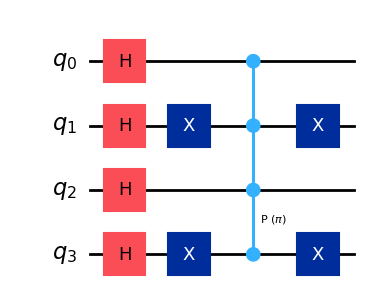

In [27]:
##############################################################
#
#  Q5.  4 qubics,  flip |5>
#
num_qubits = 4

circuit = QuantumCircuit(num_qubits)

for i in range(num_qubits):
    circuit.h(i)

circuit.x(1)
circuit.x(3)
circuit.mcp(np.pi, [0,1,2], 3)
circuit.x(1)
circuit.x(3)

circuit.draw('mpl')


In [28]:
sqrt_2_to_n = 2**(num_qubits // 2)
expr = statevector_expr(circuit, amp_norm=(1./sqrt_2_to_n, r'\frac{1}{%d}' % sqrt_2_to_n))
Math(expr)

<IPython.core.display.Math object>